# Exercise 8: Time Series Prediction using RNN

## Objective : Learning the usage of RNN for stock price prediction

## Problem : Use the PNB stock data in the csv file. Develop appropriate training and test data sets for predicting the price of the stock using the previous 4 days closing price.

## The data is given below: 
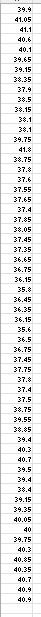

# Step 1: Reading the data and converting it into a data frame

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving PNB.csv to PNB.csv


In [ ]:
import pandas as pd
import io
df=pd.read_csv(io.BytesIO(uploaded['PNB.csv']))
df.head()

# Step 2 : Deciding the training and test data sizes and slicing of the data

In [ ]:
input=df.values # converting into an array
split_percent=0.7
tr_size=int(split_percent*len(input))
train=input[:tr_size]
test=input[tr_size:]
train.shape

(43, 1)

# Step 3 : Creation of Sequence Data Sets for Training and Testing

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
step=4
train_data=TimeseriesGenerator(train,train,length=step,batch_size=1)
test_data=TimeseriesGenerator(test,test,length=step,batch_size=1)

# Step 4 : Construction of Simple Recurrent Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [ ]:
model=Sequential()
model.add(SimpleRNN(6,activation='relu',input_shape=(4,1),kernel_regularizer='L2'))
model.add(Dense(8,activation='relu',kernel_regularizer='L2'))
model.add(Dense(1,activation='relu',kernel_regularizer='L2'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 6)                 48        
                                                                 
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


# Step 5: Model Compilation and Fitting

In [ ]:
model.compile(optimizer='RMSProp',loss='mse',metrics=['mse','mae','mape'])
model.fit(train_data,epochs=100)

# Step 6: Inline Prediction

In [ ]:
yr_pr=model.predict(train_data)
yr_pr.shape

# Step 7: Out of Sample Prediction

In [ ]:
y_pr_test=model.predict(test_data)
y_pr_test

# Step 8: Visualization of Target and Predicted values

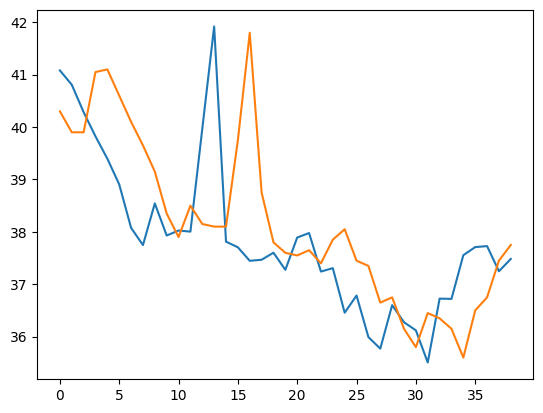

In [ ]:
import matplotlib.pyplot as plt
plt.plot(yr_pr) # plotting predicted values
plt.plot(input[:39]) # plotting my target values
plt.show()

### Conclusion: Thus we predicted the price of the stock using the previous 4 days closing price